In [1]:
import src.pmcmc.main as pmcmc_main

In [2]:
pmcmc_main.main('06', '2024-04-27')

PMCMC Progress: 0it [00:00, ?it/s]                                        2.62s/it]


Array([[0.001     , 0.0160432 , 0.01137184, ..., 0.12982485, 0.1329946 ,
        0.07626459],
       [0.03911028, 0.02117727, 0.01048695, ..., 0.13356994, 0.14157389,
        0.07697827],
       [0.03890042, 0.00979877, 0.01719936, ..., 0.14468148, 0.07808767,
        0.07116866],
       ...,
       [0.0077249 , 0.03675001, 0.01735836, ..., 0.14329055, 0.10131744,
        0.11598902],
       [0.01654181, 0.02720235, 0.02637609, ..., 0.09627733, 0.09262025,
        0.09614211],
       [0.0024256 , 0.03214093, 0.03528871, ..., 0.11011785, 0.09593406,
        0.09418713]], dtype=float32)

In [3]:
import os
import pandas as pd
from src.utils import paths
import numpy as np

loc_code = '06'
base_dir = os.path.join(paths.OUTPUT_DIR, 'pmcmc_runs')
loc_dir = os.path.join(base_dir, loc_code)
mle_states_path = os.path.join(loc_dir, 'mle_states_test_8:44_20241020.npy')

In [4]:
states_np = np.load(mle_states_path) 

In [5]:
new_h = states_np[:, 4, :]

In [6]:
new_h_df = pd.DataFrame(data=new_h)

In [7]:
new_h_df

,0,1,2,3,4,5,6,7,8,9,...,298,299,300,301,302,303,304,305,306,307
0,0.0,5.224494,4.752718,4.339257,3.913075,3.578027,3.278454,2.955788,2.716737,2.464434,...,23.086891,23.694681,24.966751,25.217745,25.323389,25.854496,27.001377,27.534420,28.169518,21.990423
1,0.0,5.224494,4.752718,4.339257,3.909276,3.540650,3.214407,2.872536,2.601962,2.319763,...,23.086891,23.792749,25.139595,25.514359,25.904388,26.645950,28.115976,29.063723,30.623699,21.990423
2,0.0,5.224494,4.752718,4.363576,3.960167,3.623678,3.371349,3.102654,2.895623,2.668252,...,22.282043,22.539345,23.522377,23.554670,25.904388,26.645950,28.324551,29.402699,22.966709,21.965902
3,0.0,5.224494,4.752718,4.309678,3.883028,3.546124,3.271982,2.920899,2.656075,2.374201,...,17.519184,17.188986,17.233870,30.765966,23.642153,24.255472,25.702744,26.618298,23.038031,21.965902
4,0.0,5.224494,4.752718,4.326729,3.890372,3.537121,3.249367,3.067611,2.862163,2.641731,...,28.167994,28.840860,30.389494,29.162777,30.991661,31.940523,31.172127,31.620369,23.038031,22.596750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,22.778687,20.956930,19.302839,4.006885,3.752303,3.538701,3.278540,3.114302,2.924851,...,22.299353,22.545496,23.474716,23.374012,22.610981,22.641413,23.252167,24.962566,25.778963,23.145390
296,0.0,22.778687,20.956930,19.388077,4.022852,3.750965,3.506211,3.239779,3.023302,2.777750,...,22.299353,22.545496,23.326000,23.069265,28.021919,28.943094,31.010107,23.203848,26.484182,25.318901
297,0.0,22.778687,20.956930,19.535261,3.903934,3.590223,3.301560,2.994843,2.755447,2.492780,...,25.504683,26.176348,27.388945,27.580549,26.333229,26.674017,27.666798,32.587826,25.136086,26.649677
298,0.0,22.778687,20.956930,19.376719,3.975856,3.654030,3.386420,3.078099,2.837944,2.589544,...,25.504683,25.908674,26.774731,26.611044,26.333229,26.674017,27.594284,27.897404,23.086777,22.483625


In [8]:
daily_estimates_df = new_h_df

In [11]:
# Get true hospitalization data

file_path = os.path.join(paths.DATASETS_DIR, 'hosp_data', 'hosp_06.csv')
all_hosp_data = pd.read_csv(file_path)
subset_df = all_hosp_data[(all_hosp_data["date"] <= "2024-04-27") & (all_hosp_data["date"] >= "2023-06-25")]
subset_df

,Unnamed: 0,date,state,previous_day_admission_influenza_confirmed
1216,81696,2023-06-25,CA,1.0
1217,78429,2023-06-26,CA,9.0
1218,77220,2023-06-27,CA,9.0
1219,75552,2023-06-28,CA,8.0
1220,79361,2023-06-29,CA,6.0
...,...,...,...,...
1519,67789,2024-04-23,CA,24.0
1520,69694,2024-04-24,CA,23.0
1521,65916,2024-04-25,CA,23.0
1522,61605,2024-04-26,CA,14.0


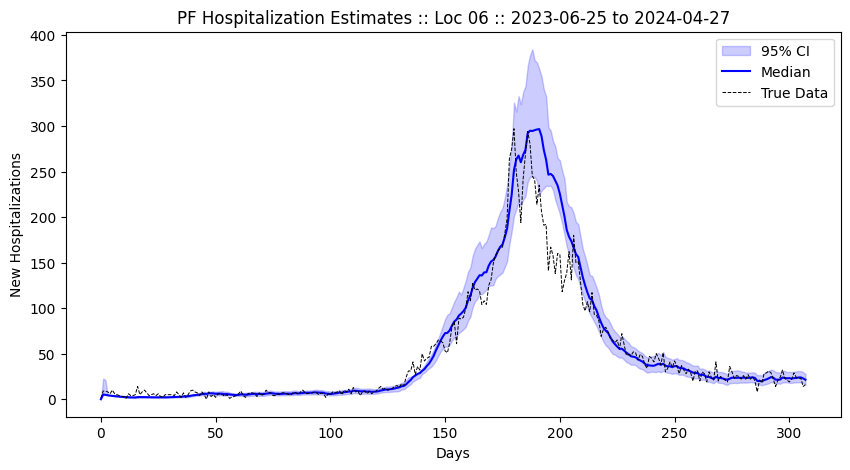

In [13]:
import matplotlib.pyplot as plt                                                                                                                                                                                                                                                                                                                  
                                                                                                                                                                                                                                                                                                                                              
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
quantiles = daily_estimates_df.quantile([0.025, 0.5, 0.975], axis=0)                                                                                                                                                                                                                                                                                             
plt.figure(figsize=(10, 5))                                                                                                                                                                                                                                                                                                                                              
plt.fill_between(range(daily_estimates_df.shape[1]), quantiles.loc[0.025], quantiles.loc[0.975], color='b', alpha=0.2, label='95% CI')                                                                                                                                                                                                                           
plt.plot(range(daily_estimates_df.shape[1]), quantiles.loc[0.5], color='b', label='Median')      
plt.plot(range(daily_estimates_df.shape[1]), subset_df['previous_day_admission_influenza_confirmed'], color='black', label='True Data', lw=0.7, ls="--")
plt.xlabel('Days')                                                                                                                                                                                                                                                                                                                               
plt.ylabel('New Hospitalizations')                                                                                                                                                                                                                                                                                                               
plt.title('PF Hospitalization Estimates :: Loc 06 :: 2023-06-25 to 2024-04-27')                                                                                                                                                                                                                                                                              
plt.legend()                                                                                                                                                                                                                                                                                                                                     
plt.show()        

In [16]:
mle_betas_path = os.path.join(os.path.join(loc_dir, 'mle_betas_test_8:44_20241020.csv'))
                              
betas_df = pd.read_csv(mle_betas_path)

In [17]:
betas_df.drop(columns=['Unnamed: 0'], inplace=True)

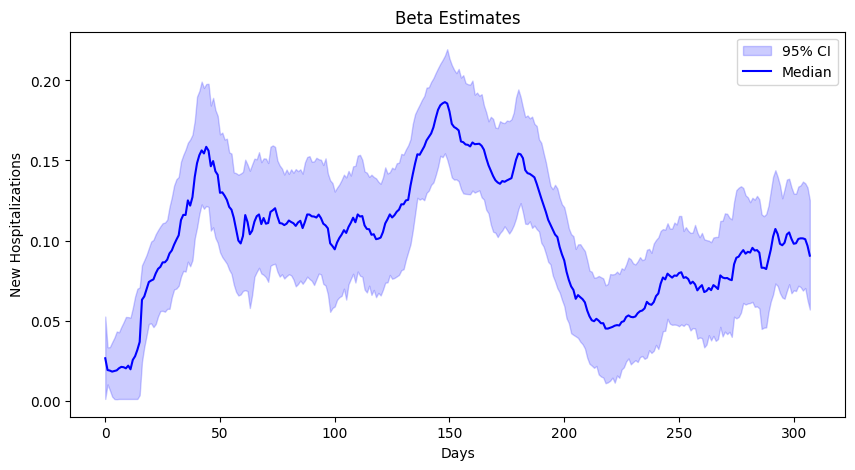

In [19]:
quantiles = betas_df.quantile([0.025, 0.5, 0.975], axis=0)                                                                                                                                                                                                                                                                                             
plt.figure(figsize=(10, 5))                                                                                                                                                                                                                                                                                                                                              
plt.fill_between(range(betas_df.shape[1]), quantiles.loc[0.025], quantiles.loc[0.975], color='b', alpha=0.2, label='95% CI')                                                                                                                                                                                                                           
plt.plot(range(betas_df.shape[1]), quantiles.loc[0.5], color='b', label='Median')      
plt.xlabel('Days')                                                                                                                                                                                                                                                                                                                               
plt.ylabel('New Hospitalizations')                                                                                                                                                                                                                                                                                                               
plt.title('Beta Estimates')                                                                                                                                                                                                                                                                              
plt.legend()                                                                                                                                                                                                                                                                                                                                     
plt.show()        